# Blog Feedback Dataset Exploratory Data Analysis

The data is taken from Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/BlogFeedback#

## Description of the Data Columns

  This data originates from blog posts. The raw HTML-documents of the blog posts were crawled and processed. The prediction task associated with the data is the prediction of the number of comments in the upcoming 24 hours. In order to simulate this situation, we choose a basetime (in the past) and select the blog posts that were published at most 72 hours before the selected base date/time. Then, we calculate all the features of the selected blog posts from the information that was available at the basetime, therefore each instance corresponds to a blog post. The target is the number of comments that the blog post received in the next 24 hours relative to the basetime. 

  In the train data, the basetimes were in the years 2010 and 2011. In the test data the basetimes were in February and March 2012. This simulates the real-world situtation in which training data from the past is available to predict events in the future. 

  The train data was generated from different basetimes that may temporally overlap. Therefore, if you simply split the train into disjoint partitions, the underlying time intervals may overlap. Therefore, the you should use the provided, temporally disjoint train and test splits in order to ensure that the evaluation is fair.

| Variables Description | Number of features |
|:---|------|
|  Average, standard deviation, min, max and median of the Attributes 51...60 for the source of the current blog post  | 1...50|
|  Total number of comments before basetime  | 51 |
|  Number of comments in the last 24 hours before the basetime  | 52 |
|  Let T1 denote the datetime 48 hours before basetime, Let T2 denote the datetime 24 hours before basetime. This attribute is the number of comments in the time period between T1 and T2  | 53 |
|  Number of comments in the first 24 hours after the publication of the blog post, but before basetime  | 54 |
|  The difference of Attribute 52 and Attribute 53  | 55 |
|  The same features as the attributes 51...55, but features 56...60 refer to the number of links (trackbacks), while features 51...55 refer to the number of comments | 56...60 |
|  The length of time between the publication of the blog post and basetime  | 61 |
|  The length of the blog post  | 62 |
|  The 200 bag of words features for 200 frequent words of the text of the blog post  | 63...262 |
|  binary indicator features (0 or 1) for the weekday (Monday...Sunday) of the basetime  | 263...269 |
|  binary indicator features (0 or 1) for the weekday (Monday...Sunday) of the date of publication of the blog post| 270...276 |
|  Number of parent pages: we consider a blog post P as a parent of blog post B, if B is a reply (trackback) to blog post P  | 277 |
|  Minimum, maximum, average number of comments that the parents received  | 278...280 |
|  The target: the number of comments in the next 24 hours (relative to basetime)  | 281 |

## Basic information
The introduction of blog feedback dataset in the machine learning repository is following:

|||
|:----|:----|:----|:----|:-----|:-----|
|Data Set Characteristics:|Multivariate|Number of Instances:|60021|Area:|Social|
|Attribute Characteristics:|Integer, Real|Number of Attributes:|Date Donated|2014-05-29|
|Associated Tasks:|Regression|Missing Values?|N/A|Number of Web Hits:|56438|


## Source:

Krisztian Buza 
Budapest University of Technology and Economics 
buza '@' cs.bme.hu 
http://www.cs.bme.hu/~buza


## basic things to do 

1.find the shape and columns data type
<br>
2.divide the data into four parts:basic features, textual features, weekday features, parent features.
<br>
3.find the skewed data and outliers
<br>
4.visualize blog feedback data set

In [5]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import glob
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import skew
from scipy.stats import kurtosis
import pandas_profiling

In [6]:
filename_test = glob.glob('BlogFeedback' + '/*test*.csv')
list_ = []
for file in filename_test:
    df = pd.read_csv(file, header=None)
    list_.append(df)
df_test = pd.concat(list_)
df_train = pd.read_csv('BlogFeedback/blogData_train.csv',header=None)

In [7]:
df_train.head()

0          1    2      3     4         5         6    7      8    9    \
0  40.30467  53.845657  0.0  401.0  15.0  15.52416  32.44188  0.0  377.0  3.0   
1  40.30467  53.845657  0.0  401.0  15.0  15.52416  32.44188  0.0  377.0  3.0   
2  40.30467  53.845657  0.0  401.0  15.0  15.52416  32.44188  0.0  377.0  3.0   
3  40.30467  53.845657  0.0  401.0  15.0  15.52416  32.44188  0.0  377.0  3.0   
4  40.30467  53.845657  0.0  401.0  15.0  15.52416  32.44188  0.0  377.0  3.0   

   ...   271  272  273  274  275  276  277  278  279   280  
0  ...   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0  
1  ...   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  
2  ...   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  
3  ...   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0  
4  ...   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  27.0  

[5 rows x 281 columns]

In [8]:
df_train.columns = [str(i) for i in range(1,282)]

In [9]:
describe_table = df_train.describe().T
describe_table

count        mean         std          min         25%         50%  \
1    52397.0   39.444167   79.121821     0.000000    2.285714   10.630660   
2    52397.0   46.806717   62.359996     0.000000    5.214318   19.353120   
3    52397.0    0.358914    6.840717     0.000000    0.000000    0.000000   
4    52397.0  339.853102  441.430109     0.000000   29.000000  162.000000   
5    52397.0   24.681661   69.598976     0.000000    0.000000    4.000000   
6    52397.0   15.214611   32.251189     0.000000    0.891566    4.150685   
7    52397.0   27.959159   38.584013     0.000000    3.075076   11.051215   
8    52397.0    0.002748    0.131903     0.000000    0.000000    0.000000   
9    52397.0  258.666030  321.348052     0.000000   22.000000  121.000000   
10   52397.0    5.829151   23.768317     0.000000    0.000000    1.000000   
11   52397.0   14.053114   28.664559     0.000000    0.775000    3.817239   
12   52397.0   28.114936   39.619195     0.000000    3.044565   11.001102   
13   52397.0    0.000000    0.000000     0.000000    0.000000    0.000000   
14   52397.0  256.865145  320.364454     0.000000   22.000000  121.000000   
15   52397.0    3.639674   14.584109     0.000000    0.000000    0.000000   
16   52397.0   34.898467   66.923819     0.000000    1.824588    9.776869   
17   52397.0   41.610585   52.831047     0.000000    4.528968   16.073494   
18   52397.0    0.358914    6.840717     0.000000    0.000000    0.000000   
19   52397.0  286.265569  374.371147     0.000000   21.000000  128.000000   
20   52397.0   21.931008   61.383375     0.000000    0.000000    3.000000   
21   52397.0    1.161498    3.973923    -0.666667    0.057971    0.223810   
22   52397.0   39.375051   56.862283     0.000000    4.087037   14.501275   
23   52397.0 -226.825047  269.067040 -1256.000000 -369.000000 -107.000000   
24   52397.0  252.386549  319.113550     0.000000   19.000000  116.000000   
25   52397.0   -0.467164    3.332347  -138.000000    0.000000    0.000000   
26   52397.0    0.501345    0.960882     0.000000    0.000000    0.108696   
27   52397.0    0.778465    0.955727     0.000000    0.000000    0.394463   
28   52397.0    0.002195    0.075003     0.000000    0.000000    0.000000   
29   52397.0    5.537531    6.989038     0.000000    0.000000    2.000000   
30   52397.0    0.279176    0.861055     0.000000    0.000000    0.000000   
..       ...         ...         ...          ...         ...         ...   
252  52397.0    0.006393    0.079704     0.000000    0.000000    0.000000   
253  52397.0    0.000191    0.013814     0.000000    0.000000    0.000000   
254  52397.0    0.025956    0.159005     0.000000    0.000000    0.000000   
255  52397.0    0.014676    0.120255     0.000000    0.000000    0.000000   
256  52397.0    0.000248    0.015750     0.000000    0.000000    0.000000   
257  52397.0    0.042044    0.200692     0.000000    0.000000    0.000000   
258  52397.0    0.002290    0.047802     0.000000    0.000000    0.000000   
259  52397.0    0.003435    0.058511     0.000000    0.000000    0.000000   
260  52397.0    0.002615    0.051067     0.000000    0.000000    0.000000   
261  52397.0    0.008455    0.091561     0.000000    0.000000    0.000000   
262  52397.0    0.000305    0.017472     0.000000    0.000000    0.000000   
263  52397.0    0.113919    0.317716     0.000000    0.000000    0.000000   
264  52397.0    0.115808    0.319998     0.000000    0.000000    0.000000   
265  52397.0    0.138100    0.345008     0.000000    0.000000    0.000000   
266  52397.0    0.165296    0.371451     0.000000    0.000000    0.000000   
267  52397.0    0.167758    0.373655     0.000000    0.000000    0.000000   
268  52397.0    0.161650    0.368133     0.000000    0.000000    0.000000   
269  52397.0    0.137470    0.344346     0.000000    0.000000    0.000000   
270  52397.0    0.159227    0.365891     0.000000    0.000000    0.000000   
271  52397.0    0.167681    0.373587     0.000000    0.000000    0.000000   
272

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52397 entries, 0 to 52396
Columns: 281 entries, 1 to 281
dtypes: float64(281)
memory usage: 112.3 MB


### Divide data set 
> 1.basic features: number of links and feedbacks in the previous 24 hours relative to baseTime; number of links and feedbacks in the time interval from 48 hours prior to baseTime to 24 hours prior to baseTime; how the number of links and feedbacks increased/decreased in the past (the past is seen relative to baseTime); number of links and feedbacks in the last 24 hours after the publication of the document, but before baseTime; aggregation of the above features by source
<br>
> 2.textual features: the most discriminative bag of words features
<br>
> 3.binary indicator features that describe on which day of the week the main text of the document was published and for which day of the week the prediction has to be calculated
<br>
> 4.we consider a document dP as a patent of document d, if d is a reply to dP , i.e., there is a trackback link on dP that points to d; parent features are the number of parents, minimum, maximum and average number of feedbacks that the parents received

In [10]:
df_train_basic =pd.concat([df_train.iloc[:,0:62],df_train['281']],axis=1)

In [11]:
df_train_textual = pd.concat([df_train.iloc[:,62:262],df_train['281']],axis=1)

In [12]:
df_train_weekday = pd.concat([df_train.iloc[:,262:276],df_train['281']],axis=1)

In [13]:
df_train_parent = pd.concat([df_train.iloc[:,276:280],df_train['281']],axis=1)

In [14]:
df_train_agg = df_train.iloc[:,0:50]

### Skewness& Kurtosis Analysis
In this part, explore the skewness and kurtosis of the basic features and parent features except the aggregate features. In normal distribution, skewness should be zero. Negative skewness indicates skew left and positive skewness indicates skew right,and Kurtosis is also zero and can only be postiive.
> Skewness: measure of lack of symmetry
<br>
> Kurtosis: measure of whether the data are heavily tailed relative to the normal distribution.


In [135]:
df_train_basic_skewness = df_train_basic[[str(i) for i in range(51,63)]].skew()
df_train_basic_kurtosis = df_train_basic[[str(i) for i in range(51,63)]].kurtosis()
df_train_parent_skewness = df_train_parent.skew()
df_train_parent_kurtosis = df_train_parent.kurtosis()

In [174]:
df_train_parent_skewness

277    69.549651
278     0.000000
279    38.318650
280    56.207119
281    12.691675
dtype: float64

In [179]:
df_parent_skew

feature       skew
277      277  69.549651
278      278   0.000000
279      279  38.318650
280      280  56.207119
281      281  12.691675

Text(0,0.5,'Parent Kurtosis')

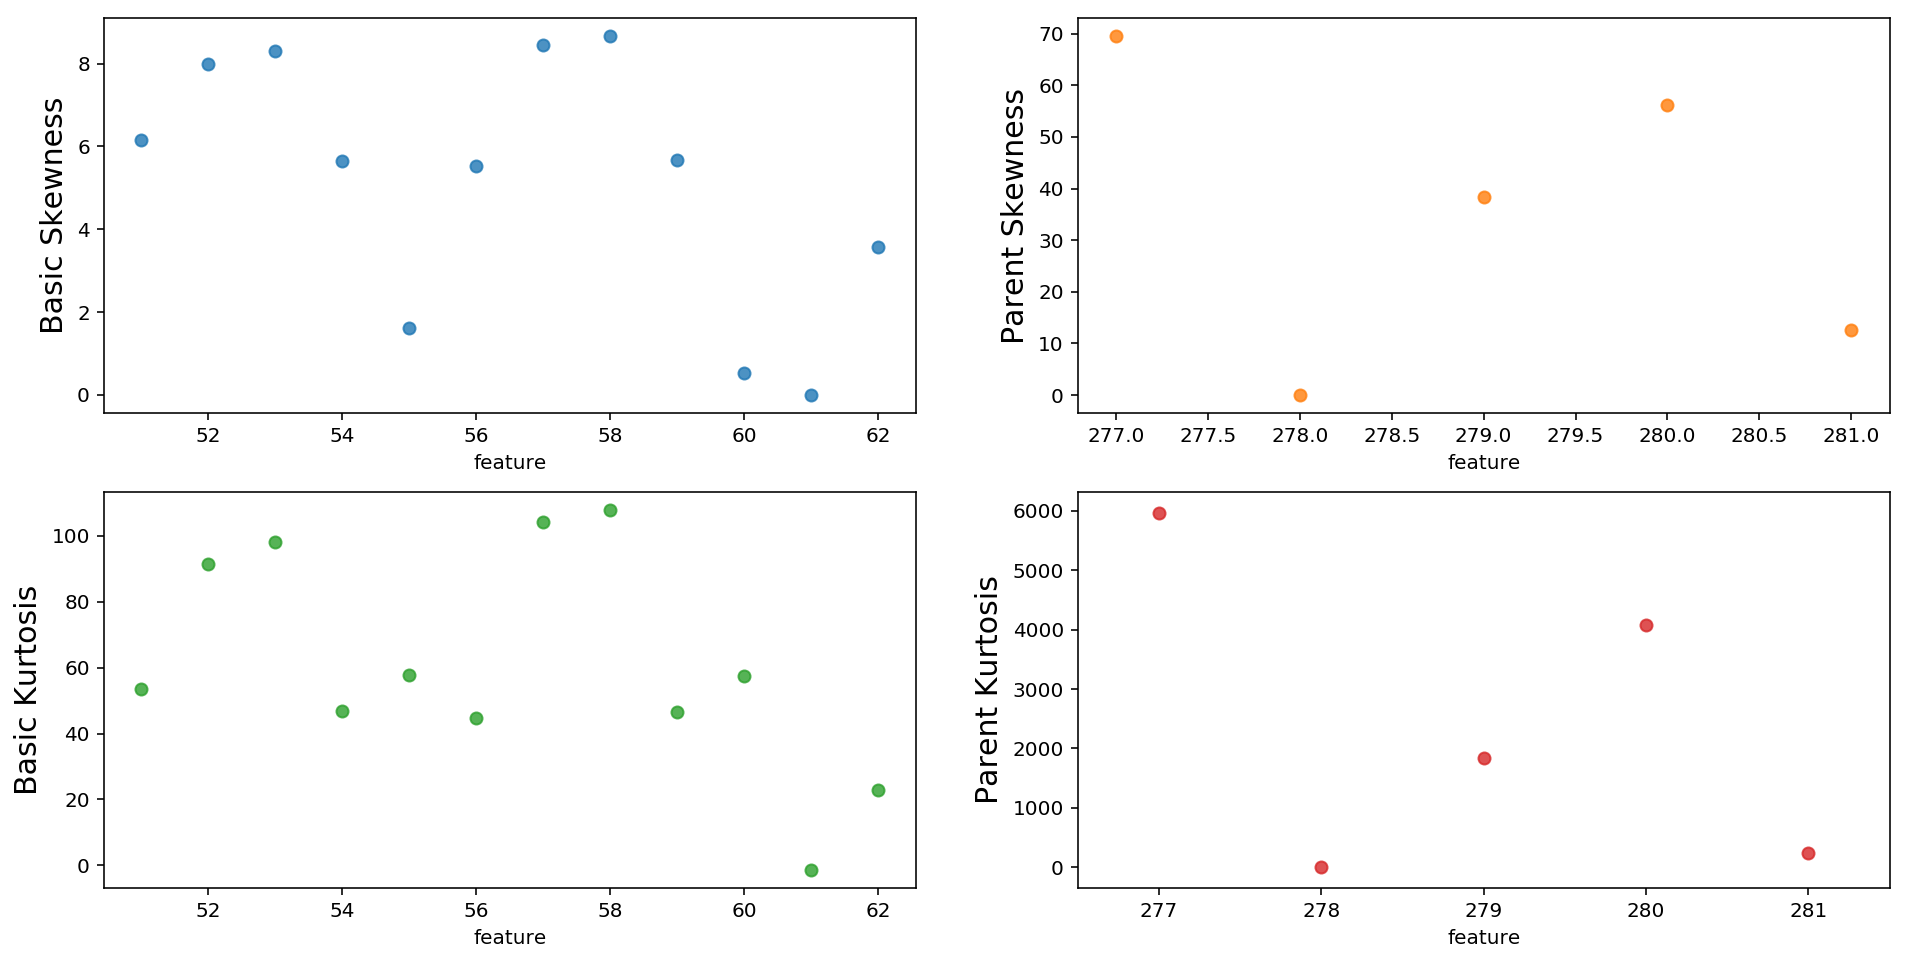

In [190]:
# find the skewed data
df_basic_skew = pd.DataFrame({'skew':df_train_basic_skewness,'feature':np.arange(51,63)})
df_basic_kurtosis = pd.DataFrame({'kurtosis':df_train_basic_kurtosis,'feature':np.arange(51,63)})
df_parent_skew = pd.DataFrame({'skew':df_train_parent_skewness,'feature':np.arange(277,282)})
df_parent_kurtosis = pd.DataFrame({'kurtosis':df_train_parent_kurtosis,'feature':np.arange(277,282)})
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(figsize=(16,8), nrows=2,ncols=2)
sns.regplot(x ='feature',y ='skew',data = df_basic_skew, fit_reg=False, ax = ax1)
sns.regplot(x = 'feature',y ='skew',data =df_parent_skew, fit_reg=False, ax = ax2)
sns.regplot(x = 'feature', y = 'kurtosis', data = df_basic_kurtosis, fit_reg=False, ax = ax3)
sns.regplot(x = 'feature', y = 'kurtosis', data = df_parent_kurtosis, fit_reg=False, ax = ax4)
ax4.set_xlim([276.5,281.5])
ax1.set_ylabel('Basic Skewness',fontsize = 15)
ax2.set_ylabel('Parent Skewness', fontsize = 15)
ax3.set_ylabel('Basic Kurtosis', fontsize = 15)
ax4.set_ylabel('Parent Kurtosis', fontsize =15)

It shows that there are two features has high skewness and Kurtosis, which are Number of parent pages and the target 

Text(0.5,0,'Comment received next 24h')

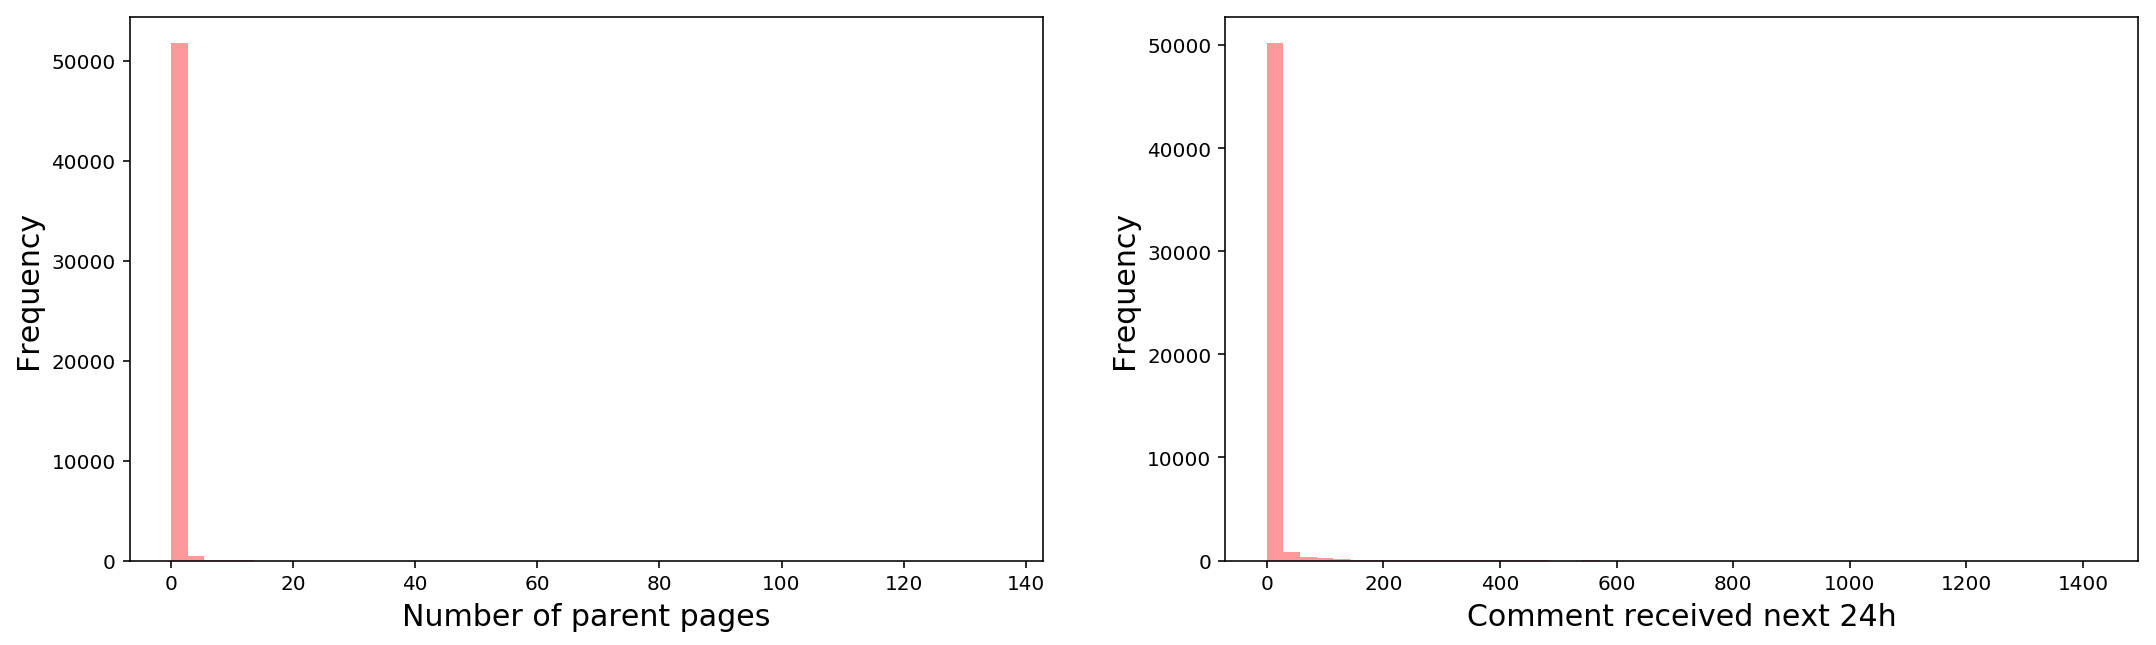

In [252]:
fig, (ax1, ax2) = plt.subplots(figsize=(18,5), ncols=2)
sns.distplot(df_train['277'], kde=False, color="red", ax=ax1)
sns.distplot(df_train['281'], kde=False, color="red", ax=ax2)
ax1.set_ylabel("Frequency",fontsize = 15)
ax2.set_ylabel("Frequency",fontsize = 15)
ax1.set_xlabel("Number of parent pages",fontsize = 15)
ax2.set_xlabel("Comment received next 24h",fontsize = 15)

Text(0.5,0,'Comment received next 24h')

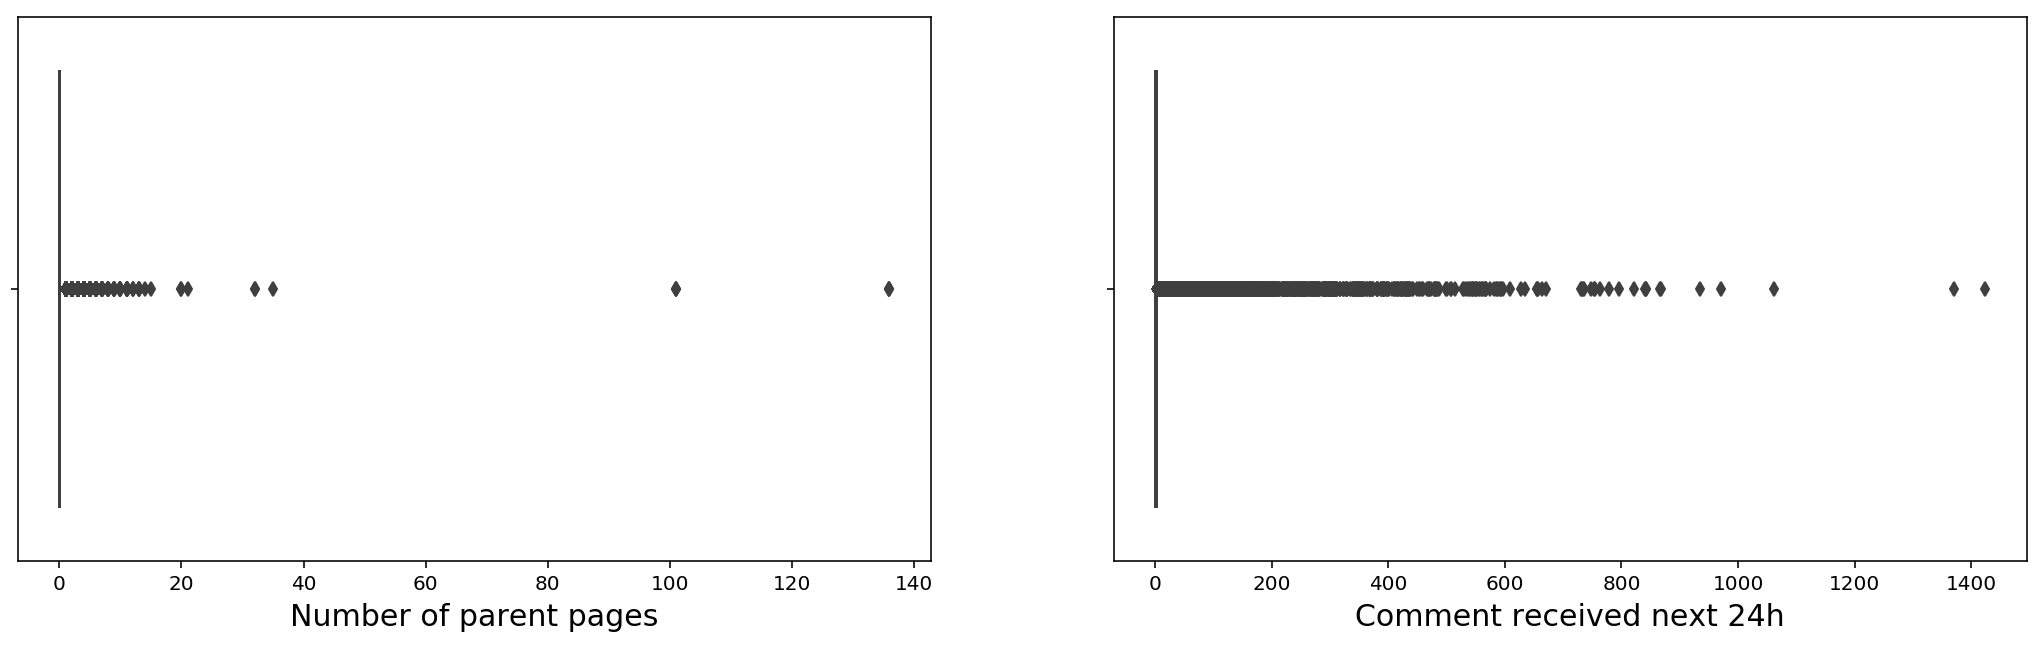

In [253]:
fig, (ax1, ax2) = plt.subplots(figsize=(18,5), ncols=2)
sns.boxplot(df_train['277'], ax = ax1)
sns.boxplot(df_train['281'], ax = ax2)
ax1.set_xlabel("Number of parent pages",fontsize = 15)
ax2.set_xlabel("Comment received next 24h",fontsize = 15)


## Log Transform
Taking a log transform will make a variable more normal.

In [263]:
(df_train[['277', '281']] + 1).apply(np.log).apply(skew)

277    5.924375
281    2.194475
dtype: float64

In [266]:
(df_train[['277', '281']] + 1).apply(np.log).apply(kurtosis)

277    46.961612
281     4.959871
dtype: float64

Text(0.5,0,'Log of No comment received next 24h')

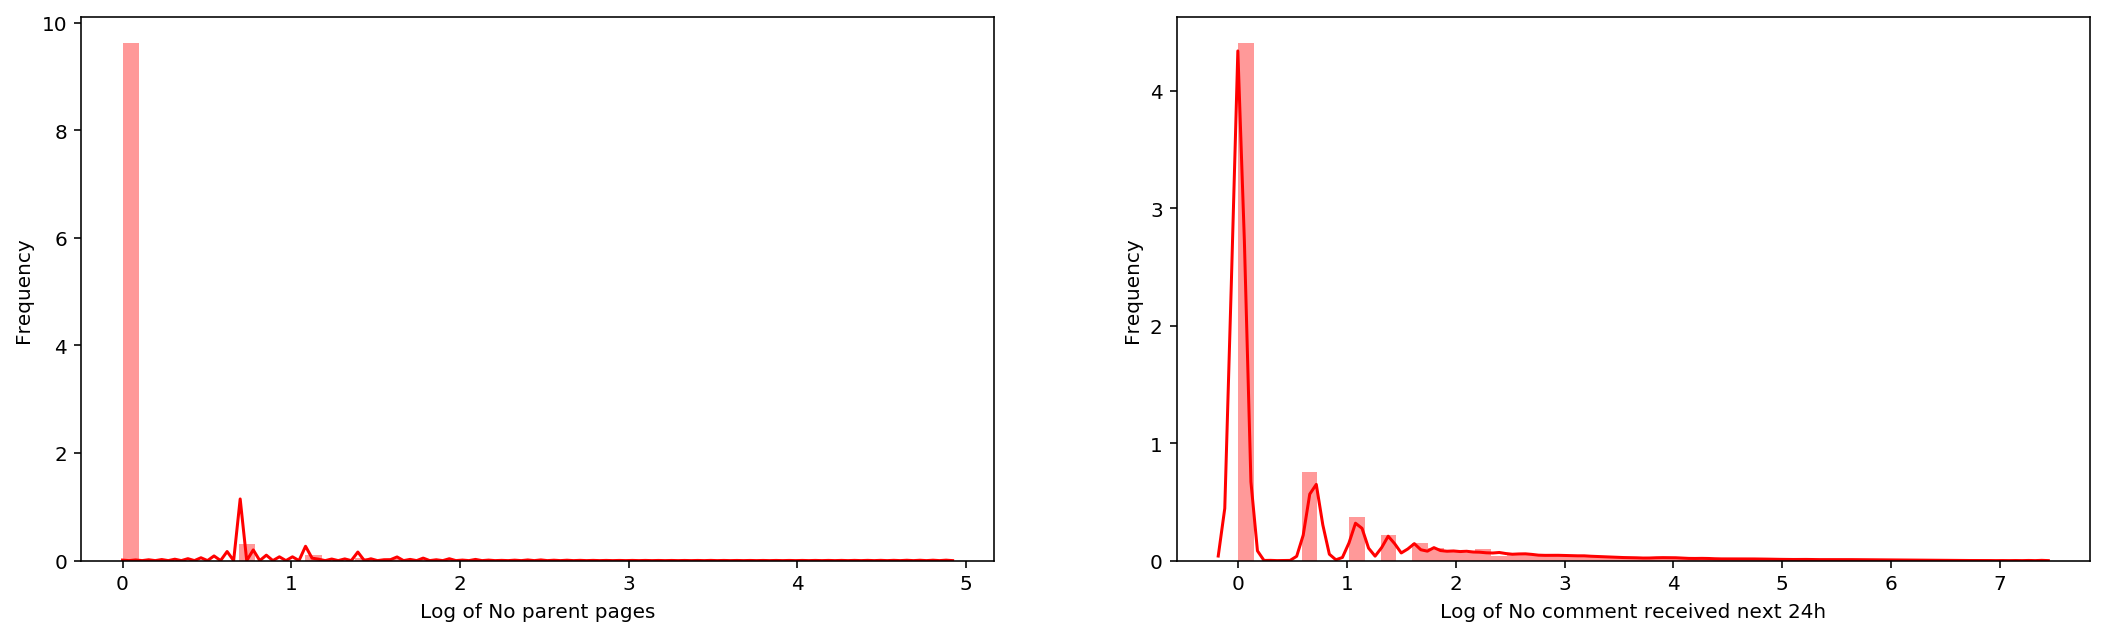

In [267]:
fig, (ax1, ax2) = plt.subplots(figsize=(18,5), ncols=2)
sns.distplot((df_train['277'] + 1).apply(np.log), kde=True, color="red", ax=ax1)
sns.distplot((df_train['281'] + 1).apply(np.log), kde=True, color="red", ax=ax2)
ax1.set_ylabel("Frequency");
ax1.set_xlabel("Log of No parent pages")
ax2.set_ylabel("Frequency");
ax2.set_xlabel("Log of No comment received next 24h")


## Detecting Outliers for numeric features
### Definatiuon of the outliers:
<br>
> Major Outlier = Upper Quartile + Interquartile Range
<br>
> Minor Outlier = Lower Quartlie - Interquartile Range
<br>
> Interquartile Range = 1.5 X (Upper Quartile - Lower Quartile)
<br>
<br>
<br>

### How to deal with outliers
1.If it is obvious that the outlier is due to incorrectly entered or measured data, you should drop the outlier.
<br>
2.If the outlier does not change the results but does affect assumptions, you may drop the outlier.  But note that in a footnote of your paper.
<br>
3.More commonly, the outlier affects both results and assumptions.  In this situation, it is not legitimate to simply drop the outlier.  You may run the analysis both with and without it, but you should state in at least a footnote the dropping of any such data points and how the results changed.
<br>
4.If the outlier creates a significant association, you should drop the outlier and should not report any significance from your analysis.

In [17]:
describe_table['Interquartile Range'] = 1.5*(describe_table['75%'] - describe_table['25%'])
describe_table['Major Outlier'] = (describe_table['75%'] + describe_table['Interquartile Range'])
describe_table['Minor Outlier'] = (describe_table['25%'] - describe_table['Interquartile Range'])
describe_table

count        mean         std          min         25%         50%  \
1    52397.0   39.444167   79.121821     0.000000    2.285714   10.630660   
2    52397.0   46.806717   62.359996     0.000000    5.214318   19.353120   
3    52397.0    0.358914    6.840717     0.000000    0.000000    0.000000   
4    52397.0  339.853102  441.430109     0.000000   29.000000  162.000000   
5    52397.0   24.681661   69.598976     0.000000    0.000000    4.000000   
6    52397.0   15.214611   32.251189     0.000000    0.891566    4.150685   
7    52397.0   27.959159   38.584013     0.000000    3.075076   11.051215   
8    52397.0    0.002748    0.131903     0.000000    0.000000    0.000000   
9    52397.0  258.666030  321.348052     0.000000   22.000000  121.000000   
10   52397.0    5.829151   23.768317     0.000000    0.000000    1.000000   
11   52397.0   14.053114   28.664559     0.000000    0.775000    3.817239   
12   52397.0   28.114936   39.619195     0.000000    3.044565   11.001102   
13   52397.0    0.000000    0.000000     0.000000    0.000000    0.000000   
14   52397.0  256.865145  320.364454     0.000000   22.000000  121.000000   
15   52397.0    3.639674   14.584109     0.000000    0.000000    0.000000   
16   52397.0   34.898467   66.923819     0.000000    1.824588    9.776869   
17   52397.0   41.610585   52.831047     0.000000    4.528968   16.073494   
18   52397.0    0.358914    6.840717     0.000000    0.000000    0.000000   
19   52397.0  286.265569  374.371147     0.000000   21.000000  128.000000   
20   52397.0   21.931008   61.383375     0.000000    0.000000    3.000000   
21   52397.0    1.161498    3.973923    -0.666667    0.057971    0.223810   
22   52397.0   39.375051   56.862283     0.000000    4.087037   14.501275   
23   52397.0 -226.825047  269.067040 -1256.000000 -369.000000 -107.000000   
24   52397.0  252.386549  319.113550     0.000000   19.000000  116.000000   
25   52397.0   -0.467164    3.332347  -138.000000    0.000000    0.000000   
26   52397.0    0.501345    0.960882     0.000000    0.000000    0.108696   
27   52397.0    0.778465    0.955727     0.000000    0.000000    0.394463   
28   52397.0    0.002195    0.075003     0.000000    0.000000    0.000000   
29   52397.0    5.537531    6.989038     0.000000    0.000000    2.000000   
30   52397.0    0.279176    0.861055     0.000000    0.000000    0.000000   
..       ...         ...         ...          ...         ...         ...   
252  52397.0    0.006393    0.079704     0.000000    0.000000    0.000000   
253  52397.0    0.000191    0.013814     0.000000    0.000000    0.000000   
254  52397.0    0.025956    0.159005     0.000000    0.000000    0.000000   
255  52397.0    0.014676    0.120255     0.000000    0.000000    0.000000   
256  52397.0    0.000248    0.015750     0.000000    0.000000    0.000000   
257  52397.0    0.042044    0.200692     0.000000    0.000000    0.000000   
258  52397.0    0.002290    0.047802     0.000000    0.000000    0.000000   
259  52397.0    0.003435    0.058511     0.000000    0.000000    0.000000   
260  52397.0    0.002615    0.051067     0.000000    0.000000    0.000000   
261  52397.0    0.008455    0.091561     0.000000    0.000000    0.000000   
262  52397.0    0.000305    0.017472     0.000000    0.000000    0.000000   
263  52397.0    0.113919    0.317716     0.000000    0.000000    0.000000   
264  52397.0    0.115808    0.319998     0.000000    0.000000    0.000000   
265  52397.0    0.138100    0.345008     0.000000    0.000000    0.000000   
266  52397.0    0.165296    0.371451     0.000000    0.000000    0.000000   
267  52397.0    0.167758    0.373655     0.000000    0.000000    0.000000   
268  52397.0    0.161650    0.368133     0.000000    0.000000    0.000000   
269  52397.0    0.137470    0.344346     0.000000    0.000000    0.000000   
270  52397.0    0.159227    0.365891     0.000000    0.000000    0.000000   
271  52397.0    0.167681    0.373587     0.000000    0.000000    0.000000   
272

In [25]:
def outlier_count(df, variable):
    major_o = describe_table.loc[variable,'Major Outlier']
    minor_o = describe_table.loc[variable,'Minor Outlier']
    major_count = df[df[variable] > major_o].shape[0]  
    minor_count = df[df[variable] < minor_o].shape[0]
    return minor_count, major_count

In [44]:
for i in [str(i) for i in range(51,63)]:
    print(i,outlier_count(df_train, i))

51 (0, 8162)
52 (0, 8971)
53 (0, 9274)
54 (0, 8531)
55 (8789, 8262)
56 (0, 9736)
57 (0, 4729)
58 (0, 4203)
59 (0, 9122)
60 (3647, 3869)
61 (0, 0)
62 (0, 2295)


In [45]:
df_train_drop = df_train.drop(df_train[df_train['62']>describe_table.loc['62','Major Outlier']].index)

Because feature 51~60 are strongly associated with the feature 1~50, and we don't have the information which day the baseline is, we do nothing with these outliers.

## Vasualizing  the data
### Examining Pair-Wise Relationship

In [178]:
df_plot_comment = df_train[[str(i) for i in range(51,63)] + [str(i) for i in range(277,282)]]

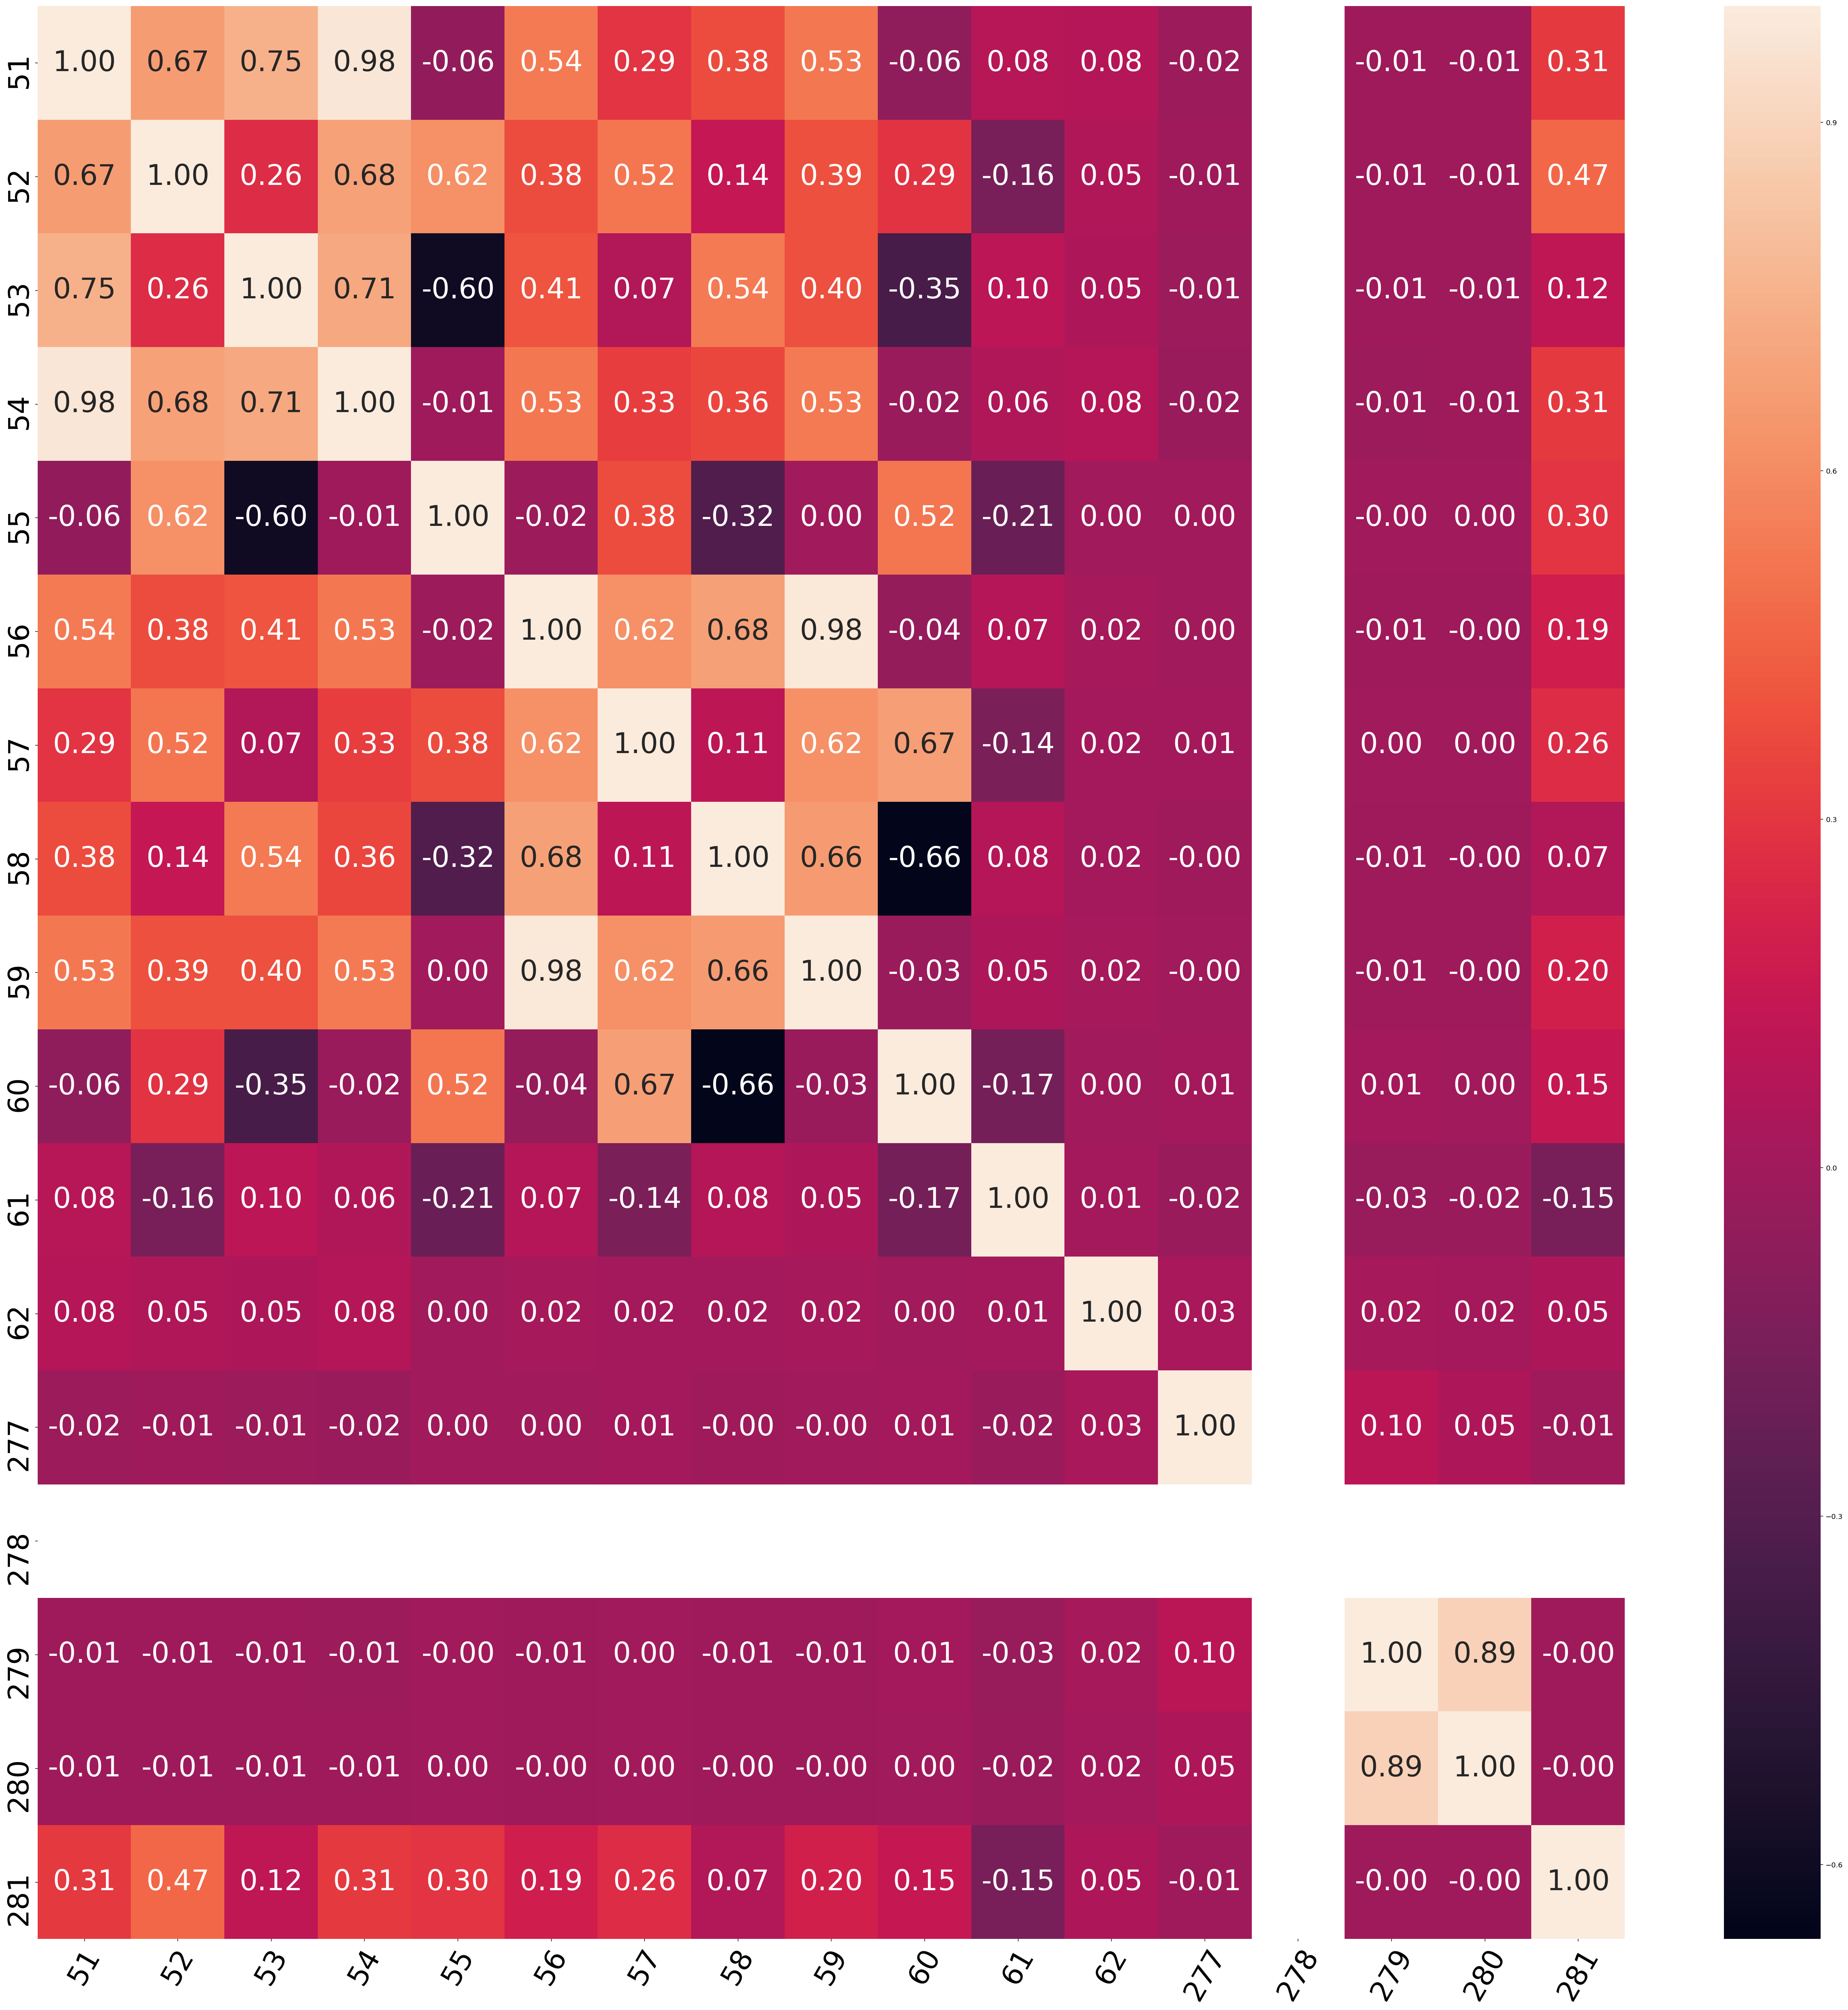

In [179]:
plt.figure(figsize=(50,50))
a = sns.heatmap(df_plot_comment.corr(), annot=True, fmt=".2f", annot_kws={"size": 40})
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=60)
a.tick_params(labelsize=40)
plt.show()

In [170]:
df_plot_day = df_train[[str(i) for i in range(263,277)] + [str(281)]]

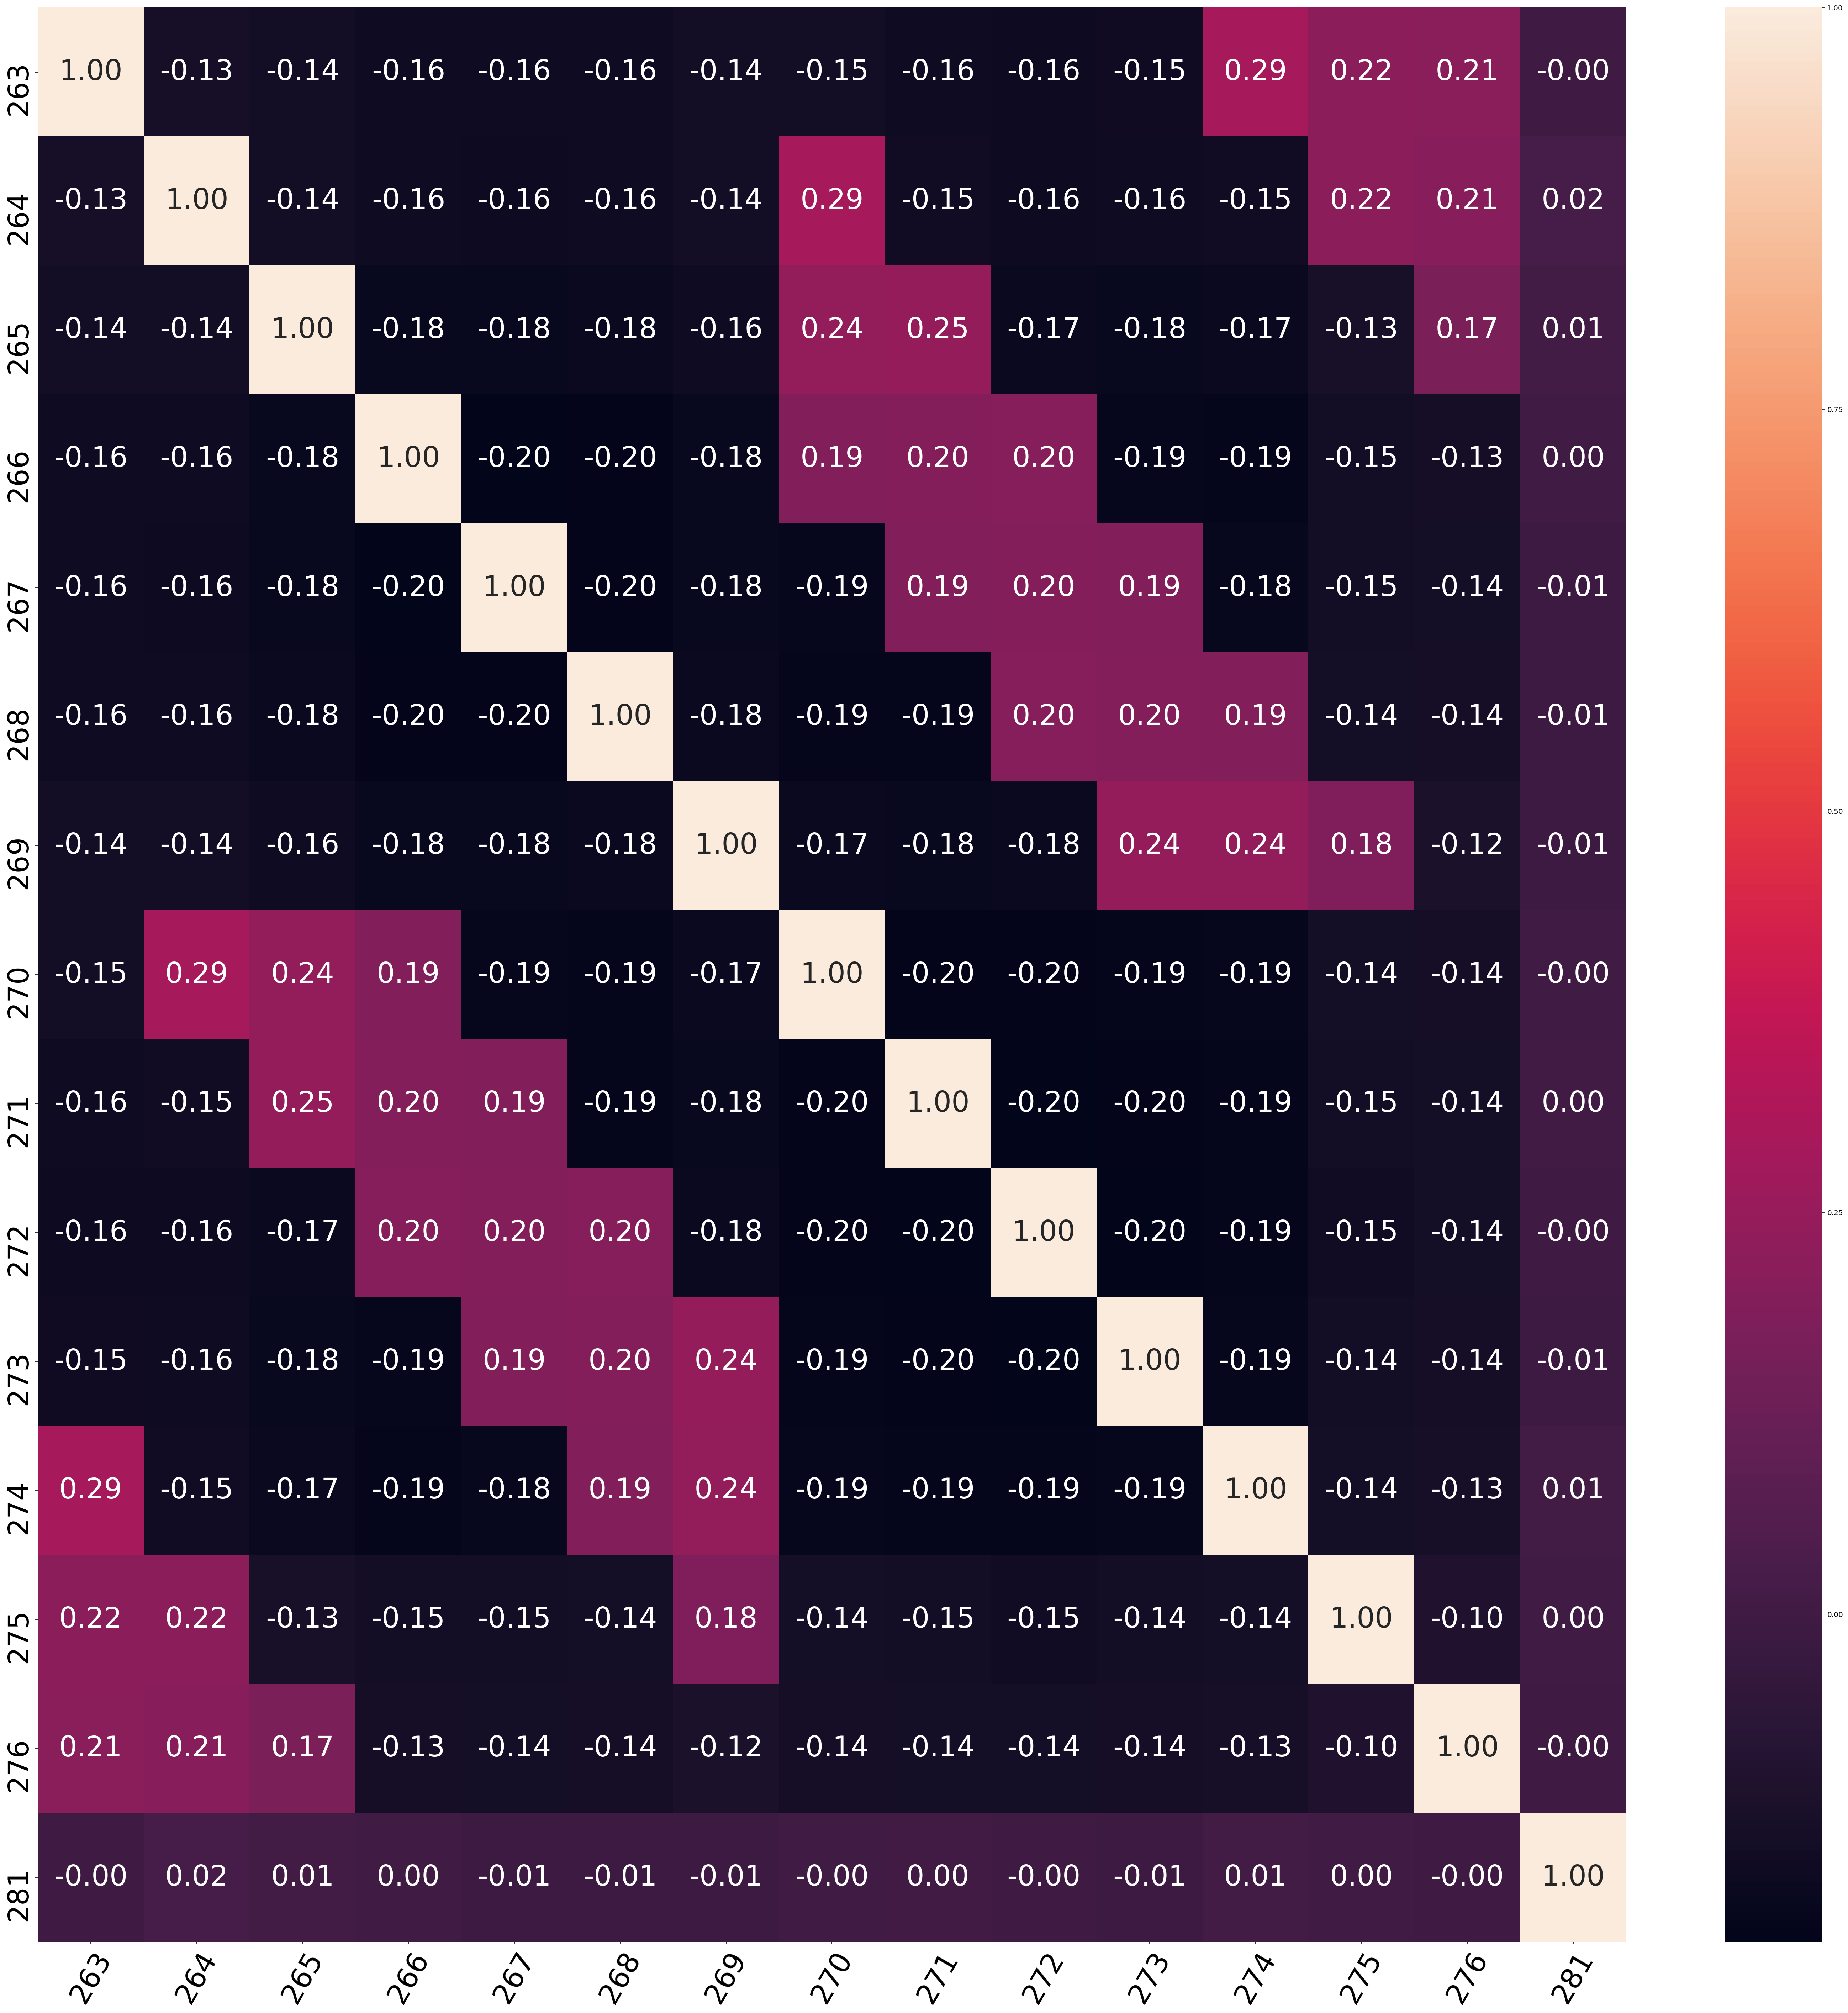

In [176]:
plt.figure(figsize=(50,50))
a = sns.heatmap(df_plot_day.corr(), annot=True, fmt=".2f", annot_kws={"size": 40})
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=60)
a.tick_params(labelsize=40)
plt.show()


From the above correlation map, it can be deduced that only following attributes are closely related (as compared to others) to the target:

|Number of features|Variable Description|corelation|
|:---|:----|-----|
|52|Number of comments in the last 24 hours before the basetime| 0.47 |
|51|Total Number of comments  before basetime|0.31|
|54|Number of comments after the blog published| 0.31 |
|55|Different between number of comments received in different time interval|0.30|
|57|Number of trackbacks in the last 24 hours before the basetime|0.26|
|56|Total Number of trackbacks before basetime|0.19|
|60|Different between number of trackbacks received in different time interval|0.15|

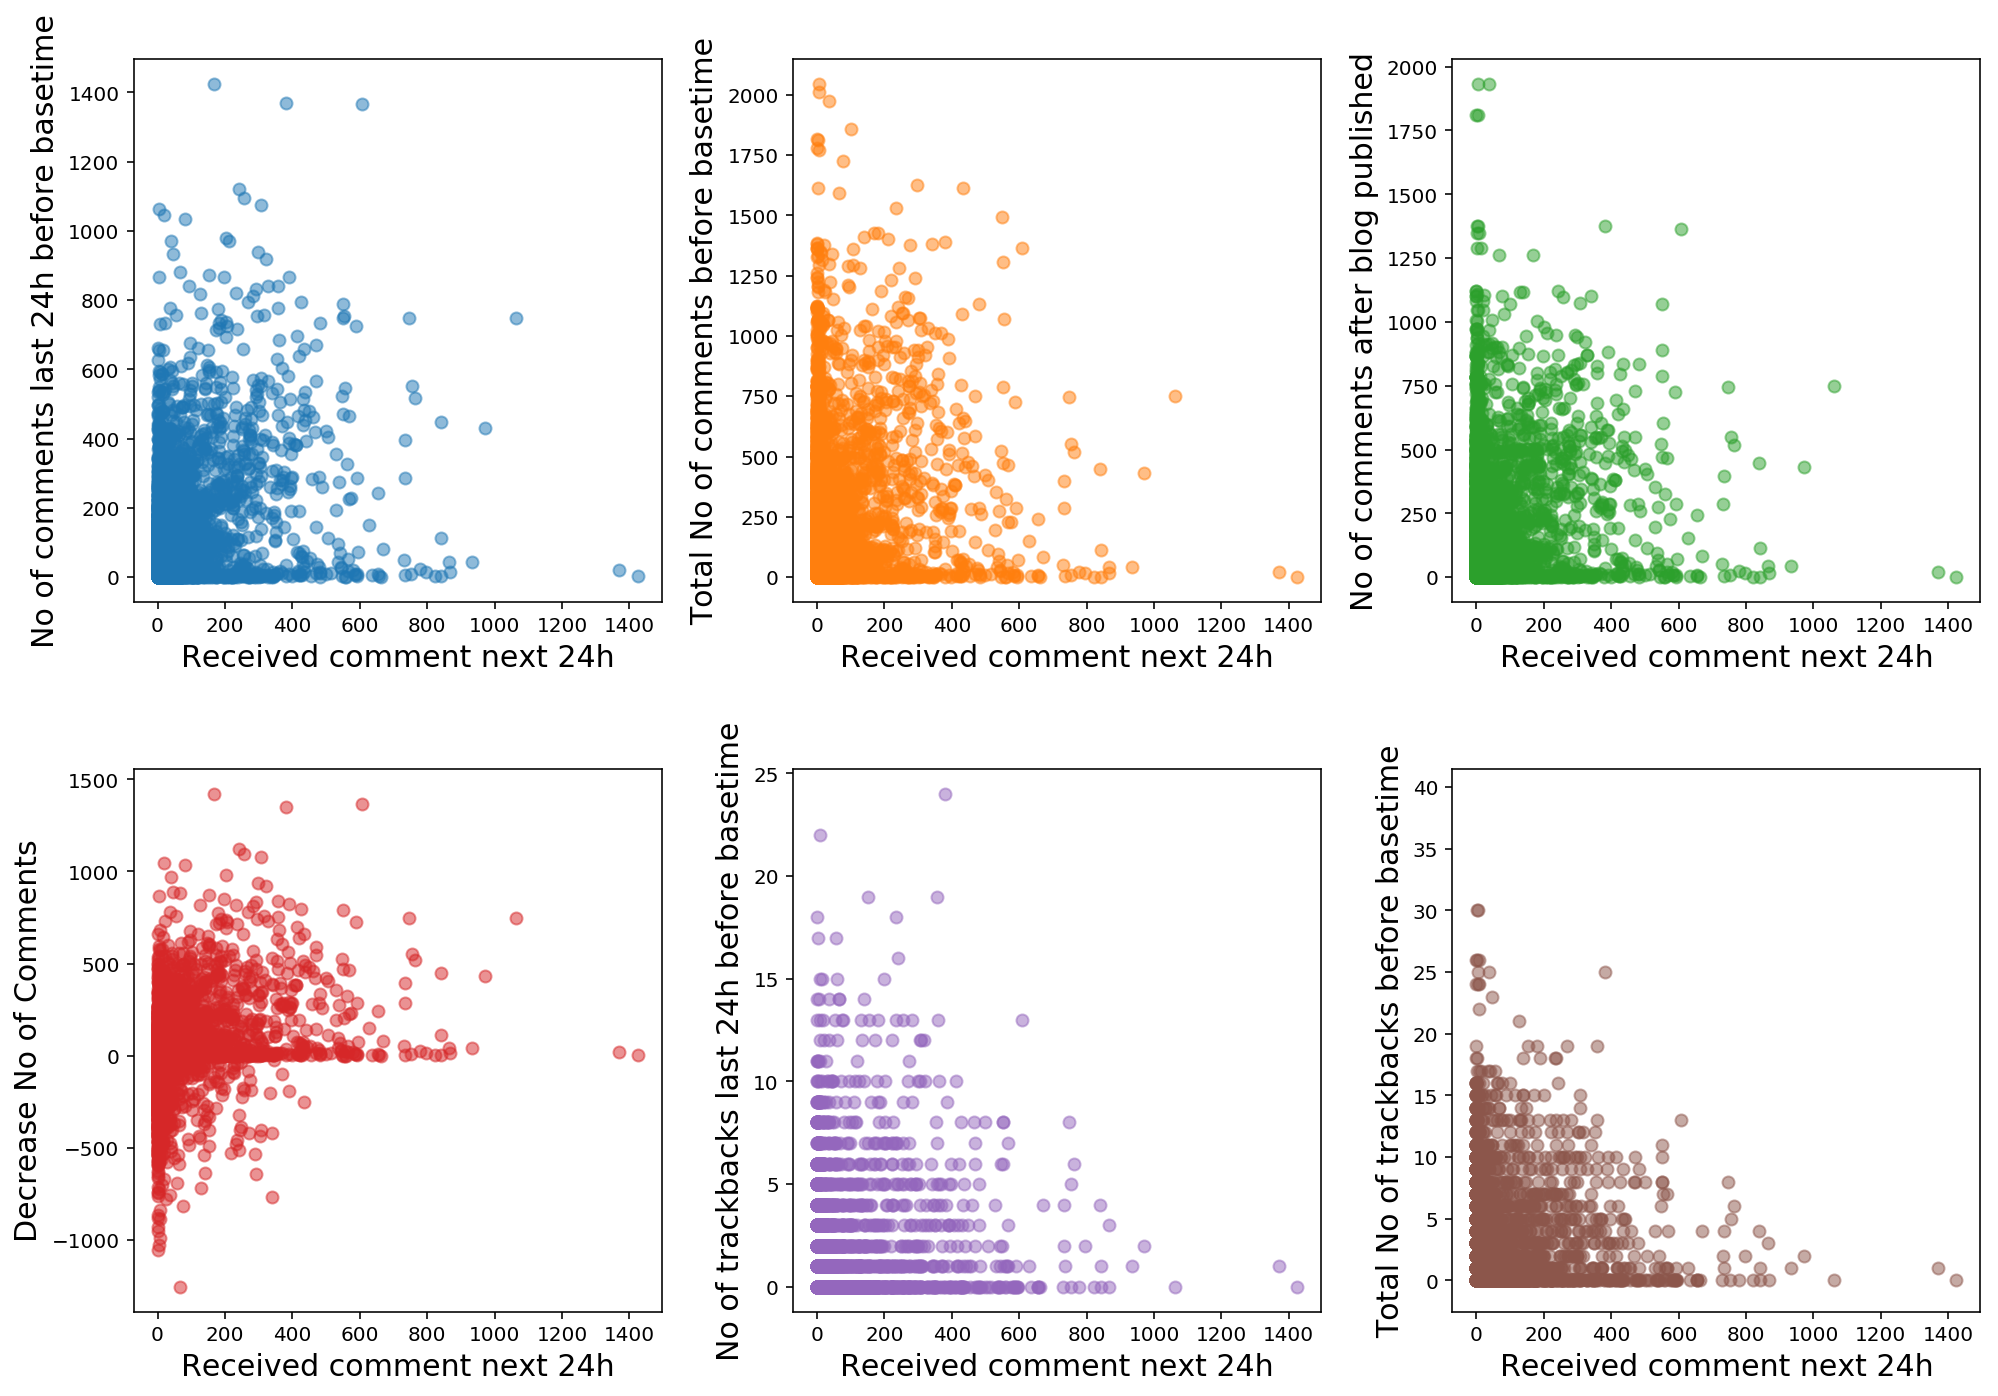

In [207]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(figsize=(14,10), nrows=2, ncols=3)
sns.regplot(x='281', y='52', data=df_train, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax1)
sns.regplot(x='281', y='51', data=df_train, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax2)
sns.regplot(x='281', y='54', data=df_train, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax3)
sns.regplot(x='281', y='55', data=df_train, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax4)
sns.regplot(x='281', y='57', data=df_train, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax5)
sns.regplot(x='281', y='56', data=df_train, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax6)
ax1.set_xlabel('Received comment next 24h',fontsize = 15)
ax2.set_xlabel('Received comment next 24h',fontsize = 15)
ax3.set_xlabel('Received comment next 24h',fontsize = 15)
ax4.set_xlabel('Received comment next 24h',fontsize = 15)
ax5.set_xlabel('Received comment next 24h',fontsize = 15)
ax6.set_xlabel('Received comment next 24h',fontsize = 15)
ax1.set_ylabel('No of comments last 24h before basetime',fontsize = 15)
ax2.set_ylabel('Total No of comments before basetime',fontsize = 15)
ax3.set_ylabel('No of comments after blog published',fontsize = 15)
ax4.set_ylabel('Decrease No of Comments',fontsize = 15)
ax5.set_ylabel('No of trackbacks last 24h before basetime',fontsize = 15)
ax6.set_ylabel('Total No of trackbacks before basetime',fontsize = 15)
plt.tight_layout()

## Overview of the blog feedback dataset

In [15]:
pandas_profiling.ProfileReport(df_train)